In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<function seaborn.categorical.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

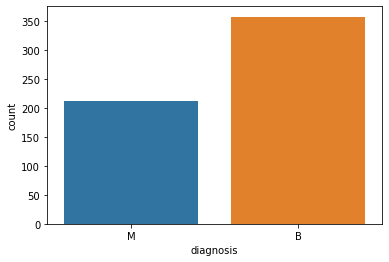

In [384]:
sns.countplot(df['diagnosis'],label="Count")
sns.countplot

In [385]:
del data['Unnamed: 32']
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [386]:
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [387]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [388]:
# Initialising the ANN
classifier = Sequential()

In [389]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [392]:
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [393]:
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [394]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [395]:
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=100, epochs=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

Epoch 1/150
512/512 [==============================] - 4s 8ms/step - loss: 0.6927 - accuracy: 0.6270
Epoch 2/150
512/512 [==============================] - 0s 85us/step - loss: 0.6919 - accuracy: 0.6289
Epoch 3/150
512/512 [==============================] - 0s 87us/step - loss: 0.6912 - accuracy: 0.6289
Epoch 4/150
512/512 [==============================] - 0s 88us/step - loss: 0.6903 - accuracy: 0.6289
Epoch 5/150
512/512 [==============================] - 0s 82us/step - loss: 0.6895 - accuracy: 0.6289
Epoch 6/150
512/512 [==============================] - 0s 85us/step - loss: 0.6887 - accuracy: 0.6289
Epoch 7/150
512/512 [==============================] - 0s 85us/step - loss: 0.6878 - accuracy: 0.6289
Epoch 8/150
512/512 [==============================] - 0s 85us/step - loss: 0.6868 - accuracy: 0.6289
Epoch 9/150
512/512 [==============================] - 0s 84us/step - loss: 0.6854 - accuracy: 0.6289
Epoch 10/150
512/512 [==============================] - 0s 81us/step - loss: 0.6839

512/512 [==============================] - 0s 102us/step - loss: 0.3779 - accuracy: 0.9785
Epoch 81/150
512/512 [==============================] - 0s 116us/step - loss: 0.3730 - accuracy: 0.9785
Epoch 82/150
512/512 [==============================] - 0s 86us/step - loss: 0.3711 - accuracy: 0.9863
Epoch 83/150
512/512 [==============================] - 0s 77us/step - loss: 0.3651 - accuracy: 0.9824
Epoch 84/150
512/512 [==============================] - 0s 81us/step - loss: 0.3675 - accuracy: 0.9824
Epoch 85/150
512/512 [==============================] - 0s 81us/step - loss: 0.3624 - accuracy: 0.9863
Epoch 86/150
512/512 [==============================] - 0s 81us/step - loss: 0.3594 - accuracy: 0.9844
Epoch 87/150
512/512 [==============================] - 0s 73us/step - loss: 0.3552 - accuracy: 0.9883
Epoch 88/150
512/512 [==============================] - 0s 77us/step - loss: 0.3541 - accuracy: 0.9863
Epoch 89/150
512/512 [==============================] - 0s 81us/step - loss: 0.3480 

In [396]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [397]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  0],
       [ 0, 22]])

Our accuracy is 100.0%


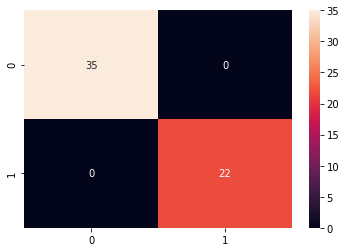

In [398]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [399]:
prediction = pd.DataFrame(y_pred,columns=["Predicted"])
prediction['Predicted'] = prediction['Predicted'].map({True: 1, False: 0})
actual = pd.DataFrame(y_test,columns=["Actual"])
df_predict = pd.concat([prediction,actual],axis=1)
df_predict

,Predicted,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [400]:
df_loss = pd.DataFrame(model.history.history)
df_loss

,loss,accuracy
0,0.692892,0.553846
1,0.691924,0.637363
2,0.690774,0.637363
3,0.689057,0.641758
4,0.686691,0.661538
...,...,...
145,0.029094,0.991209
146,0.028944,0.991209
147,0.028805,0.991209
148,0.028677,0.991209


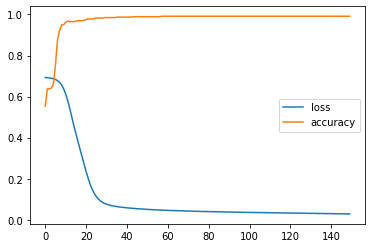

In [401]:
df_loss.plot()